In [1]:
%matplotlib inline

from fair_spice.fair.models import inverse_fair
from fair.RCPs import rcp6

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm


## Basic Inverse example

This notebook demonstrates basic use of the inverse FAIR model.

1. Create an atmospheric CO2 concentration pathway.
2. Run the model once using all the default parameters.


In [2]:
nt = 141
C = 284.3*1.01**np.arange(nt)

In [3]:
data = inverse_fair({'C':C})
data

<xarray.Dataset>
Dimensions:      (time: 141)
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 ... 134 135 136 137 138 139 140
    C            (time) float64 284.3 287.1 290.0 ... 1.134e+03 1.145e+03
Data variables:
    temperature  (time) float64 0.01086 0.02422 0.03956 ... 3.6 3.63 3.66
    forcing      (time) float64 0.1199 0.1732 0.2265 0.2797 ... 7.47 7.523 7.576
    emissions    (time) float64 13.41 19.46 11.01 10.65 ... 31.99 32.2 32.42

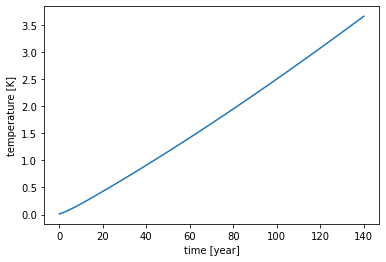

In [4]:
data.temperature.plot()

## A simple ensemble

Vary the ECS and TCR and consider the effect on temperature.

Draw ECS and TCR from a bivariate uniform distribution.

In [5]:
size = 100
tcr = np.random.normal(3,1, size=(size,))
ecs = np.random.normal(4,1, size=(size,))

In [6]:
runs = []
for t, e in zip(tcr, ecs):
    runs.append(inverse_fair({'C':C, 'tcr':t, 'ecs':e}))

ensemble = xr.concat(runs, dim='ensemble_member')
ensemble

<xarray.Dataset>
Dimensions:      (ensemble_member: 100, time: 141)
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 ... 134 135 136 137 138 139 140
    C            (time) float64 284.3 287.1 290.0 ... 1.134e+03 1.145e+03
    tcr          (ensemble_member) float64 3.209 2.483 3.349 ... 2.943 3.536
    ecs          (ensemble_member) float64 4.425 3.328 4.979 ... 4.555 5.469
Dimensions without coordinates: ensemble_member
Data variables:
    temperature  (ensemble_member, time) float64 0.02286 0.05095 ... 7.865 7.928
    forcing      (ensemble_member, time) float64 0.1199 0.1732 ... 7.523 7.576
    emissions    (ensemble_member, time) float64 13.41 19.46 ... 28.14 28.33

(0.0, 8.0)

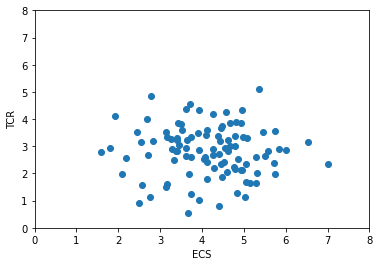

In [7]:
plt.scatter(ensemble.ecs, ensemble.tcr)

plt.xlabel('ECS')
plt.ylabel('TCR')

plt.xlim(0,8)
plt.ylim(0,8)

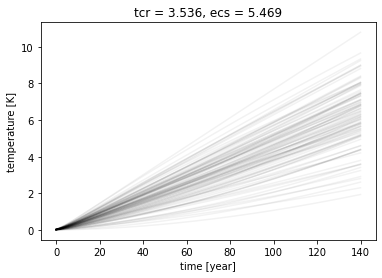

In [8]:
fig, ax = plt.subplots()

for member in ensemble.ensemble_member:
    ensemble.temperature.sel(ensemble_member=member).plot(ax=ax, color='black', alpha=0.05)